In [1]:
import numpy as np

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.1 MB/s eta 0:00:00


In [2]:

# no_coating = [ np.round(i,2) for i in np.random.normal(11,1,30)];
# coating_a = [ np.round(i,2) for i in np.random.normal(11.25,1,30)];
# coating_b = [ np.round(i,2) for i in np.random.normal(11.75,1,30)];

no_coating = [12.57, 11.44, 12.07, 12.61, 11.15, 10.08, 11.66, 11.78, 10.94, 10.31, 10.52, 10.07, 11.25, 10.92, 10.63, 12.98, 11.46, 9.89, 12.44, 11.85, 10.8, 11.36, 10.8, 11.75, 9.36, 9.85, 11.66, 10.45, 9.84, 10.81]

coating_a = [11.16, 10.12, 11.8, 13.89, 10.51, 10.31, 10.75, 11.59, 11.57, 11.93, 10.04, 10.88, 11.32, 11.66, 11.8, 10.7, 11.96, 11.52, 9.86, 11.72, 10.3, 12.16, 12.21, 11.29, 11.04, 11.58, 10.26, 9.29, 10.32, 10.43]

coating_b = [11.59, 10.47, 10.93, 11.45, 12.73, 11.95, 10.28, 13.79, 11.95, 9.15, 11.76, 13.22, 9.88, 12.66, 12.53, 12.04, 11.51, 12.61, 11.27, 12.7, 12.74, 10.01, 12.07, 11.22, 11.04, 11.35, 12.01, 12.56, 12.37, 11.03]


In [3]:
print(coating_b)

[11.59, 10.47, 10.93, 11.45, 12.73, 11.95, 10.28, 13.79, 11.95, 9.15, 11.76, 13.22, 9.88, 12.66, 12.53, 12.04, 11.51, 12.61, 11.27, 12.7, 12.74, 10.01, 12.07, 11.22, 11.04, 11.35, 12.01, 12.56, 12.37, 11.03]


In [4]:
no_coating_df = pd.DataFrame(no_coating,columns=['QE'])
coating_a_df = pd.DataFrame(coating_a,columns=['QE'])
coating_b_df = pd.DataFrame(coating_b,columns=['QE'])

no_coating_df['Sensor Treatment'] = 'none'
coating_a_df['Sensor Treatment'] = 'coating A'
coating_b_df['Sensor Treatment'] = 'coating B'

coating_a_df.head()

,QE,Sensor Treatment
0,11.16,coating A
1,10.12,coating A
2,11.80,coating A
3,13.89,coating A
4,10.51,coating A


### Examples of how to concatenate our three prepared dataframes into one merged dataframe

In [5]:
no_coating_df['ObsID'] = np.arange(1,len(no_coating_df)+1)
coating_a_df['ObsID'] = np.arange(1,len(coating_a_df)+1)
coating_b_df['ObsID'] = np.arange(1,len(coating_b_df)+1)

coating_a_df.head()

,QE,Sensor Treatment,ObsID
0,11.16,coating A,1
1,10.12,coating A,2
2,11.80,coating A,3
3,13.89,coating A,4
4,10.51,coating A,5


In [6]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df])
concatDF

,QE,Sensor Treatment,ObsID
0,12.57,none,1
1,11.44,none,2
2,12.07,none,3
3,12.61,none,4
4,11.15,none,5
...,...,...,...
25,11.35,coating B,26
26,12.01,coating B,27
27,12.56,coating B,28
28,12.37,coating B,29


In [7]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df])
concatDF

concatDF = concatDF.reset_index(drop='0')
concatDF.head()

,QE,Sensor Treatment,ObsID
0,12.57,none,1
1,11.44,none,2
2,12.07,none,3
3,12.61,none,4
4,11.15,none,5


In [8]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df],ignore_index=True,sort=False)
concatDF

,QE,Sensor Treatment,ObsID
0,12.57,none,1
1,11.44,none,2
2,12.07,none,3
3,12.61,none,4
4,11.15,none,5
...,...,...,...
85,11.35,coating B,26
86,12.01,coating B,27
87,12.56,coating B,28
88,12.37,coating B,29


https://pingouin-stats.org/build/html/generated/pingouin.rm_anova.html

# T-tests between two groups

Grab data for only groups where a sensor treatment has been applied (two groups!)

In [9]:
two_group_df = pd.concat([coating_a_df,coating_b_df])
two_group_df.head()

,QE,Sensor Treatment,ObsID
0,11.16,coating A,1
1,10.12,coating A,2
2,11.80,coating A,3
3,13.89,coating A,4
4,10.51,coating A,5


<Axes: xlabel='Sensor Treatment', ylabel='QE'>

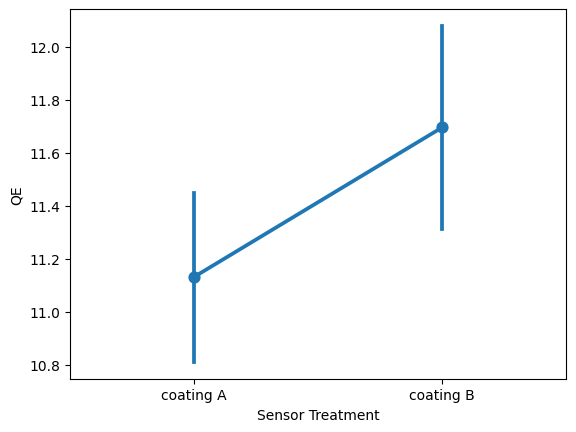

In [10]:
sns.pointplot(two_group_df, y='QE', x='Sensor Treatment')

### Unpaired ttest

First, test normality using the Shapiro-Wilk test.
https://pingouin-stats.org/build/html/generated/pingouin.normality.html

The null hypothesis is that the data is normally distributed.  If p<0.05 (or whatever alpha is) then it is unlikely that our data is normally distributed.

In [11]:
pg.normality(two_group_df['QE'])

,W,pval,normal
QE,0.988016,0.82222,True


Becuase the variable is normally distributed, we can continue using our normal parametric tests.  If it were not, we would have to look up the appropriate non-parametric test to use instead of an unpaired ttest.

In [12]:
pg.ttest(coating_a_df['QE'], coating_b_df['QE'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.200275,58,two-sided,0.031784,"[-1.08, -0.05]",0.568109,1.926,0.580757


### Paired ttest

In [13]:
pg.normality(two_group_df['QE'])

,W,pval,normal
QE,0.988016,0.82222,True


In [14]:
pg.ttest(coating_a_df['QE'], coating_a_df['QE'], paired=True)

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:248: UserWarning: x and y are equals. Cannot compute T or p-value.
  warnings.warn("x and y are equals. Cannot compute T or p-value.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,NaN,29,two-sided,NaN,"[nan, nan]",0.0,nan,0.05



# Anovas
---



<Axes: xlabel='Sensor Treatment', ylabel='QE'>

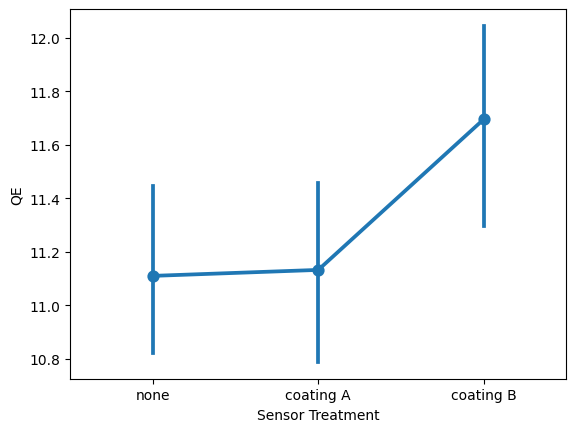

In [15]:
sns.pointplot(concatDF, y='QE', x='Sensor Treatment')

## One-way, between-subject ANOVA

In [16]:
pg.normality(concatDF['QE'])

,W,pval,normal
QE,0.989417,0.688237,True


In [17]:
# pg.homoscedasticity(concatDF, dv='QE')
pg.homoscedasticity(concatDF,dv='QE',group='Sensor Treatment')

,W,pval,equal_var
levene,0.240241,0.786958,True


In [18]:
pg.anova(concatDF, dv='QE', between='Sensor Treatment')

,Source,ddof1,ddof2,F,p-unc,np2
0,Sensor Treatment,2,87,3.513457,0.034089,0.074733


Post-hoc tests, which are only appropriate if the ANOVA revealed significant difference.  In this case, it does not, but for the sake of demonstration...

Here are the results of pairwise t-tests using Bonferroni correction.

<!-- pingouin.ptests(self, paired=False, decimals=3, padjust=None, stars=True, pval_stars={0.001: '***', 0.01: '**', 0.05: '*'}, **kwargs)¶ -->

https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests

This is an unusual outcome.  My current understanding is that the significant difference of 'coating B' vs 'none' is due to type 1 error, but I may update this in the future.

In [19]:
pg.pairwise_tests(concatDF, dv='QE',between='Sensor Treatment',  padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Sensor Treatment,coating A,coating B,False,True,-2.200275,58.0,two-sided,0.031784,0.095352,bonf,1.926,-0.560730
1,Sensor Treatment,coating A,none,False,True,0.093564,58.0,two-sided,0.925778,1.000000,bonf,0.263,0.023844
2,Sensor Treatment,coating B,none,False,True,2.287259,58.0,two-sided,0.025847,0.077541,bonf,2.253,0.582898


This is a strange case where the ANOVA is not significant, but one of our post-hoc multiple comparisons *is* significant.  

Here are some writings on what to do in this case:
https://help.xlstat.com/6741-how-interpret-contradictory-results-between-anova-and

Note that an alternative and generally more accepted post-hoc test is the pairwise Tukey-test, which does a better job at controlling for type 1 error.  It does NOT reveal a significant difference at any level.  Note that pairwise Tukey cannot be used on a repeated measures design.

In [20]:
pg.pairwise_tukey(concatDF, dv='QE',between='Sensor Treatment')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,coating A,coating B,11.132333,11.695667,-0.563333,0.250394,-2.249792,0.068601,-0.560730
1,coating A,none,11.132333,11.110000,0.022333,0.250394,0.089193,0.995624,0.023844
2,coating B,none,11.695667,11.110000,0.585667,0.250394,2.338985,0.055734,0.582898


# One-way, within-subject (repeated measures) ANOVA

In [21]:
pg.normality(concatDF['QE'])

,W,pval,normal
QE,0.989417,0.688237,True


In [22]:
pg.rm_anova(concatDF, dv='QE', subject='ObsID', within='Sensor Treatment')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Sensor Treatment,2,58,3.429823,0.039098,0.074733,0.924165


Because the results are significant, it is appropriate to run posthoc tests (pairwise ttests using correction for type1 erro). Here are the results of pairwise t-tests using Bonferroni correction.

<!-- pingouin.ptests(self, paired=False, decimals=3, padjust=None, stars=True, pval_stars={0.001: '***', 0.01: '**', 0.05: '*'}, **kwargs)¶ -->

https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests

In [23]:

pg.pairwise_tests(concatDF, dv='QE', subject='ObsID', within='Sensor Treatment',padjust='bonf')


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Sensor Treatment,coating A,coating B,True,True,-2.057856,29.0,two-sided,0.048692,0.146076,bonf,1.222,-0.560730
1,Sensor Treatment,coating A,none,True,True,0.104225,29.0,two-sided,0.917708,1.000000,bonf,0.195,0.023844
2,Sensor Treatment,coating B,none,True,True,2.185329,29.0,two-sided,0.037089,0.111268,bonf,1.52,0.582898


This result suggests that the only difference is between 'coating B' and 'none'

# Two-way ANOVAs

First, I have to create some fake data.  This isn't so straightforward for this type of dataset, but here we go...

In [24]:
# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(7.5,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(8.25,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(9.75,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(0.45,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.4,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.05,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(0.45,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.4,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.05,0.15,len(s_1))

In [25]:
# s_1

s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'

s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_df = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
two_way_df

,QE,pixel size,sensor treatment,observer id
0,7.370000,small,a,1
1,8.080000,small,a,2
2,6.740000,small,a,3
3,6.910000,small,a,4
4,7.330000,small,a,5
...,...,...,...,...
25,8.318566,large,c,26
26,9.613527,large,c,27
27,10.461588,large,c,28
28,10.088917,large,c,29


### Plot the interaction

<Axes: xlabel='sensor treatment', ylabel='QE'>

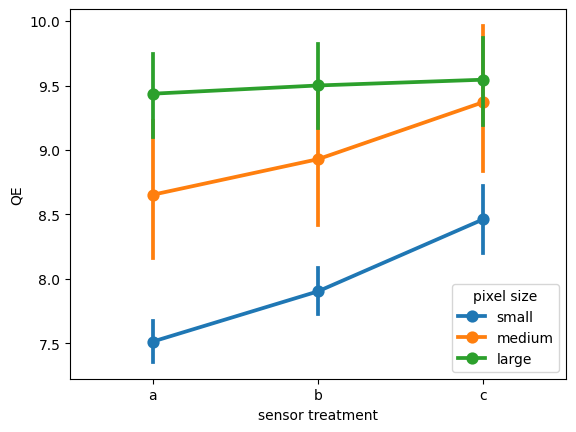

In [26]:
sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

### Plot the main effect of sensor treatment (collapse over pixel size)

<Axes: xlabel='sensor treatment', ylabel='QE'>

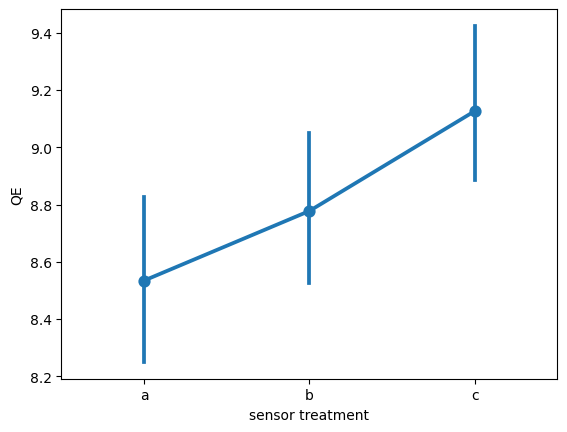

In [27]:
sns.pointplot(two_way_df, y='QE', x='sensor treatment')

### Plot the main effect of pixel size (collapse over sensor treatment)

<Axes: xlabel='pixel size', ylabel='QE'>

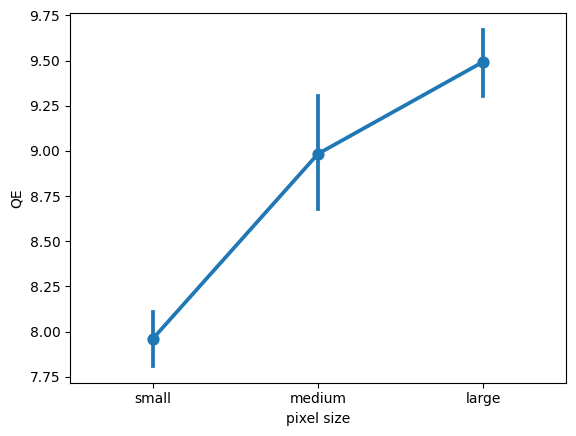

In [28]:
sns.pointplot(two_way_df, y='QE', x='pixel size')

### Two-way with a between-subjects design

In [29]:
# pg.anova(two_way_df, dv='QE', between=['pixel size','sensor size'])

## Now, let's run this as a two-way ANOVA

In [30]:
data = pd.DataFrame({'a': np.random.normal(size=100),
                         'b': np.random.normal(size=100),
                         'c': np.random.normal(size=100),
                         'd': np.random.normal(size=100),
                         'e': np.random.normal(size=100)})

# data

### Note to Gabe:  The normality test needs to be applied to the ANOVA's residuals.  Unfortunately, Pingouin doesn't return residuals, yet!  

In [31]:
# pg.normality(two_way_df['QE'])

In [32]:
pg.anova(two_way_df, dv='QE', between=['sensor treatment','pixel size'])

,Source,SS,DF,MS,F,p-unc,np2
0,sensor treatment,15.949728,2,7.974864,6.609102,1.584972e-03,0.048203
1,pixel size,109.918787,2,54.959393,45.547138,1.077932e-17,0.258721
2,sensor treatment * pixel size,5.776703,4,1.444176,1.196849,3.125863e-01,0.018012
3,Residual,314.935303,261,1.206649,NaN,NaN,NaN


Post-hoc tests.  Because the interaction is not significant, we can set `interaction=False` to supress that unnecessary output.

In [33]:
pg.pairwise_tests(two_way_df, dv='QE', between=['pixel size','sensor treatment'], interaction=False)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,pixel size,large,medium,False,True,2.673151,178.0,two-sided,8.212942e-03,4.305,0.396808
1,pixel size,large,small,False,True,12.525153,178.0,two-sided,3.238833e-26,7.887e+22,1.859261
2,pixel size,medium,small,False,True,5.669295,178.0,two-sided,5.692594e-08,2.01e+05,0.841563
3,sensor treatment,a,b,False,True,-1.271863,178.0,two-sided,2.050809e-01,0.342,-0.188798
4,sensor treatment,a,c,False,True,-3.111073,178.0,two-sided,2.171657e-03,13.479,-0.461815
5,sensor treatment,b,c,False,True,-1.873058,178.0,two-sided,6.269988e-02,0.819,-0.278041


### Here's another dataset with two independent variables.  In this case, I'm building in a significant interaction between the variables.

<Axes: xlabel='sensor treatment', ylabel='QE'>

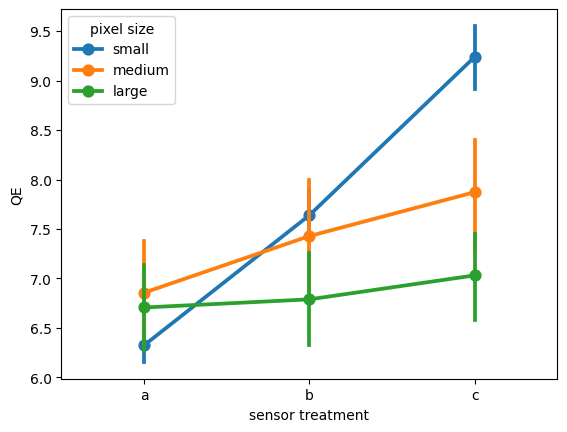

In [34]:
# s_1
# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(6.3,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(6.5,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(6.7,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(1.5,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.6,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.1,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(1.5,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.6,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.2,0.15,len(s_1))


s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'

s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_interaction = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
two_way_interaction
sns.pointplot(two_way_interaction, y='QE', x='sensor treatment',hue='pixel size')

In [36]:
pg.anova(two_way_interaction, dv='QE', between=['sensor treatment','pixel size'])

,Source,SS,DF,MS,F,p-unc,np2
0,sensor treatment,90.769454,2,45.384727,29.262413,3.417708e-12,0.183162
1,pixel size,36.319174,2,18.159587,11.708638,1.349994e-05,0.082334
2,sensor treatment * pixel size,54.454095,4,13.613524,8.777502,1.158094e-06,0.118571
3,Residual,404.799623,261,1.550956,NaN,NaN,NaN


In [37]:
pg.pairwise_tests(two_way_interaction, dv='QE', between=['sensor treatment', 'pixel size'],padjust='sidak')

,Contrast,sensor treatment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,sensor treatment,-,a,b,False,True,-3.583820,178.0,two-sided,4.369996e-04,1.310426e-03,sidak,55.187,-0.531990
1,sensor treatment,-,a,c,False,True,-6.789141,178.0,two-sided,1.621843e-10,4.865528e-10,sidak,5.052e+07,-1.007795
2,sensor treatment,-,b,c,False,True,-3.535623,178.0,two-sided,5.186154e-04,1.555039e-03,sidak,47.408,-0.524836
3,pixel size,-,large,medium,False,True,-2.499898,178.0,two-sided,1.332755e-02,3.945213e-02,sidak,2.866,-0.371090
4,pixel size,-,large,small,False,True,-4.492574,178.0,two-sided,1.263046e-05,3.789089e-05,sidak,1351.106,-0.666888
5,pixel size,-,medium,small,False,True,-1.544626,178.0,two-sided,1.242128e-01,3.282684e-01,sidak,0.488,-0.229288
6,sensor treatment * pixel size,a,large,medium,False,True,-0.415588,58.0,two-sided,6.792451e-01,9.999641e-01,sidak,0.282,-0.105911
7,sensor treatment * pixel size,a,large,small,False,True,1.570611,58.0,two-sided,1.217130e-01,6.890232e-01,sidak,0.733,0.400263
8,sensor treatment * pixel size,a,medium,small,False,True,1.838499,58.0,two-sided,7.111088e-02,4.851569e-01,sidak,1.066,0.468533
9,sensor treatment * pixel size,b,large,medium,False,True,-1.719557,58.0,two-sided,9.084577e-02,5.756365e-01,sidak,0.897,-0.438222


### Two-way with a within-subjects design

---



In [38]:
pg.rm_anova(two_way_interaction, dv='QE', within=['sensor treatment','pixel size'],subject = 'observer id')

/usr/local/lib/python3.10/dist-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,sensor treatment,90.769454,2,58,45.384727,480.871909,7.819347e-37,4.388098e-29,0.183162,0.774935
1,pixel size,36.319174,2,58,18.159587,4.342178,1.748707e-02,2.443365e-02,0.082334,0.827625
2,sensor treatment * pixel size,54.454095,4,116,13.613524,104.824475,1.402274e-37,6.086501e-11,0.118571,0.239987


In [39]:
pg.pairwise_tests(two_way_interaction, dv='QE', within=['sensor treatment', 'pixel size'],subject = 'observer id', padjust='sidak')

,Contrast,sensor treatment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,sensor treatment,-,a,b,True,True,-14.851621,29.0,two-sided,4.339723e-15,1.298961e-14,sidak,1.437e+12,-0.894984
1,sensor treatment,-,a,c,True,True,-25.322319,29.0,two-sided,2.515314e-21,0.000000e+00,sidak,1.401e+18,-1.850264
2,sensor treatment,-,b,c,True,True,-22.027459,29.0,two-sided,1.180364e-19,0.000000e+00,sidak,3.455e+16,-0.975992
3,pixel size,-,large,medium,True,True,-1.499934,29.0,two-sided,1.444406e-01,3.737460e-01,sidak,0.532,-0.377910
4,pixel size,-,large,small,True,True,-3.701181,29.0,two-sided,8.946496e-04,2.681548e-03,sidak,36.557,-0.877267
5,pixel size,-,medium,small,True,True,-1.162342,29.0,two-sided,2.545732e-01,5.857954e-01,sidak,0.359,-0.290499
6,sensor treatment * pixel size,a,large,medium,True,True,-0.433552,29.0,two-sided,6.678219e-01,9.999508e-01,sidak,0.212,-0.105911
7,sensor treatment * pixel size,a,large,small,True,True,1.610677,29.0,two-sided,1.180827e-01,6.772614e-01,sidak,0.617,0.400263
8,sensor treatment * pixel size,a,medium,small,True,True,1.850572,29.0,two-sided,7.444274e-02,5.015408e-01,sidak,0.876,0.468533
9,sensor treatment * pixel size,b,large,medium,True,True,-1.702498,29.0,two-sided,9.935944e-02,6.100908e-01,sidak,0.702,-0.438222


## Mixed design

In [40]:
n = 30

s_1 = [ np.round(i,2) for i in np.random.normal(5.1,0.5,n)];
m_1 = s_1 + np.random.normal(0.8,0.5,len(s_1))
l_1 = m_1 + np.random.normal(0.8,0.5,len(s_1))

s_2 = [ np.round(i,2) for i in np.random.normal(5.9,0.5,n)];
m_2 = s_2 + np.random.normal(0.8,0.5,len(s_1))
l_2 = m_2 + np.random.normal(0.1,0.5,len(s_1))

s_3 = [ np.round(i,2) for i in np.random.normal(6.5,0.5,n)];
m_3 = s_3 + np.random.normal(.5,0.5,len(s_1))
l_3 = m_3 + np.random.normal(0,0.5,len(s_1))

# s_1 = [ np.round(i,2) for i in np.random.normal(5.1,0.5,n)];
# m_1 = [ np.round(i,2) for i in np.random.normal(5.9,0.5,n)];
# l_1 = [ np.round(i,2) for i in np.random.normal(7.1,0.5,n)];

# s_2 = s_1 + np.random.normal(.7,0.5,len(s_1))
# m_2 = m_1 + np.random.normal(0.8,0.5,len(s_1))
# l_2 = l_1 + np.random.normal(0.1,0.5,len(s_1))

# s_3 = s_2 + np.random.normal(0.7,0.5,len(s_1))
# m_3 = m_2 + np.random.normal(0,0.5,len(s_1))
# l_3 = l_2 + np.random.normal(0,0.5,len(s_1))

s_1 = pd.DataFrame(s_1,columns=['dprime'])
m_1 = pd.DataFrame(m_1,columns=['dprime'])
l_1 = pd.DataFrame(l_1,columns=['dprime'])

s_2 = pd.DataFrame(s_2,columns=['dprime'])
m_2 = pd.DataFrame(m_2,columns=['dprime'])
l_2 = pd.DataFrame(l_2,columns=['dprime'])

s_3 = pd.DataFrame(s_3,columns=['dprime'])
m_3 = pd.DataFrame(m_3,columns=['dprime'])
l_3 = pd.DataFrame(l_3,columns=['dprime'])

s_1['experience'] = 'early career'
m_1['experience'] = 'mid career'
l_1['experience'] = 'late career'

s_2['experience'] = 'early career'
m_2['experience'] = 'mid career'
l_2['experience'] = 'late career'

s_3['experience'] = 'early career'
m_3['experience'] = 'mid career'
l_3['experience'] = 'late career'

s_1['contrast'] = 'low'
m_1['contrast'] = 'low'
l_1['contrast'] = 'low'

s_2['contrast'] = 'medium'
m_2['contrast'] = 'medium'
l_2['contrast'] = 'medium'

s_3['contrast'] = 'high'
m_3['contrast'] = 'high'
l_3['contrast'] = 'high'

# 1:30
s_1['observer id'] = np.arange(1,n+1)
s_2['observer id'] = np.arange(1,n+1)
s_3['observer id'] = np.arange(1,n+1)

#31:60
m_1['observer id'] = np.arange(n+1,2*n+1)
m_2['observer id'] = np.arange(n+1,2*n+1)
m_3['observer id'] = np.arange(n+1,2*n+1)

#61:90
l_1['observer id'] = np.arange(2*n+1,3*n+1)
l_2['observer id'] = np.arange(2*n+1,3*n+1)
l_3['observer id'] = np.arange(2*n+1,3*n+1)

two_way_mixed = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
# two_way_mixed


<Axes: xlabel='contrast', ylabel='dprime'>

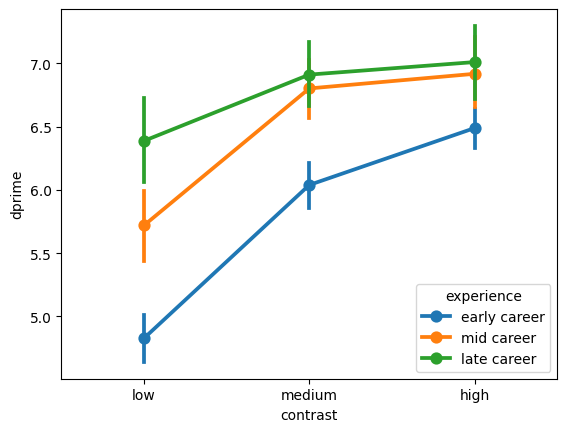

In [41]:
sns.pointplot(two_way_mixed, x='contrast', y='dprime', hue='experience')

In [42]:
pg.mixed_anova(two_way_mixed, dv='dprime', within='contrast',between='experience',subject = 'observer id')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,experience,46.000827,2,87,23.000414,40.556228,3.593289e-13,NaN,0.482489,NaN,NaN,NaN,NaN
1,contrast,68.263632,2,174,34.131816,73.083578,9.120212e-24,3.075432e-21,0.456534,0.935687,False,0.931266,0.043576
2,Interaction,8.855243,4,174,2.213811,4.740246,1.180025e-03,NaN,0.098263,NaN,NaN,NaN,NaN


In [43]:

pg.pairwise_tests(two_way_mixed, dv='dprime', within='contrast',between='experience',subject = 'observer id',correction=True,padjust='sidak')

,Contrast,contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,contrast,-,high,low,True,True,9.734097,89.000000,two-sided,1.134831e-15,3.330669e-15,sidak,5.722e+12,1.315800
1,contrast,-,high,medium,True,True,2.245548,89.000000,two-sided,2.720955e-02,7.942771e-02,sidak,1.261,0.298265
2,contrast,-,low,medium,True,True,-9.460298,89.000000,two-sided,4.183729e-15,1.265654e-14,sidak,1.611e+12,-1.066838
3,experience,-,early career,late career,False,True,-9.486742,43.983722,two-sided,3.319448e-12,9.958367e-12,sidak,2.347e+10,-2.417655
4,experience,-,early career,mid career,False,True,-6.774858,44.391978,two-sided,2.345549e-08,7.036648e-08,sidak,1.277e+06,-1.726543
5,experience,-,late career,mid career,False,True,2.251883,57.985567,two-sided,2.813244e-02,8.204527e-02,sidak,2.112,0.573883
6,contrast * experience,high,early career,late career,False,True,-3.003678,44.785977,two-sided,4.354726e-03,3.851673e-02,sidak,9.968,-0.765474
7,contrast * experience,high,early career,mid career,False,True,-2.580801,46.360069,two-sided,1.308584e-02,1.117926e-01,sidak,3.974,-0.657706
8,contrast * experience,high,late career,mid career,False,True,0.442277,57.806513,two-sided,6.599388e-01,9.999392e-01,sidak,0.285,0.112712
9,contrast * experience,low,early career,late career,False,True,-8.016232,45.065990,two-sided,3.231239e-10,2.908115e-09,sidak,1.146e+08,-2.042902


<Axes: xlabel='sensor treatment', ylabel='QE'>

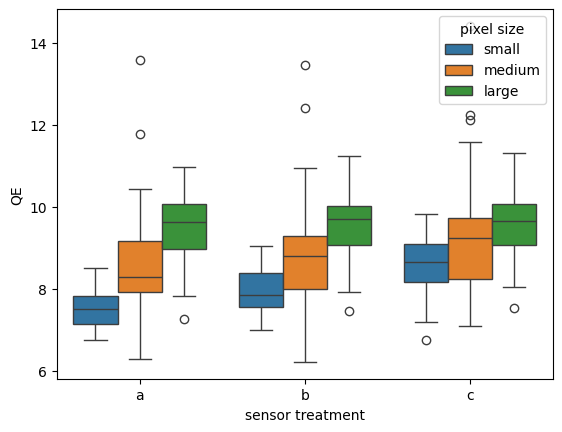

In [44]:
sns.boxplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

In [45]:

### This code is something gabe was playing with, but put aside for now.

# nObservers_group = 20

# # Three groups (Experience level: early career, mid career, late career)
# # Three contrasts (low, medium, high)

# # EL, EM, EL, ML, MM, MH, HL, HM, HH

# contrast_scalars = [1, 2, 3]
# experience_scalars = [.5, 1, 1]


# mu_list = []

# for contrast_level, experience_level in zip(np.arange(0,len(contrast_scalars)), np.arange(0,len(experience_scalars))):
#   mu_level = .5 + 0.3*contrast_scalars[contrast_level] + 0.2*experience_scalars[experience_level]
#   sigma_level = np.random.normal(0.3, 0.1)




# df.pivot(index='patient', columns='obs', values='score')
# sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')